In [1]:
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
# read the train and test dataset
import sklearn
import pandas as pd
import re
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import svm
from sklearn import tree

In [2]:
data = pd.read_csv('Behavioral Biometrics/dataEditCopy.csv')
testData = pd.read_csv('Behavioral Biometrics/dataEditCopyLeftovers.csv')

In [3]:
data.head()

,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
0,112,392,280,368,88,144,56,144,88,272,...,624,688,64,334.545455,225.454545,330.181818,105.333333,3744,1.633729e+12,1
1,104,376,272,392,120,248,128,208,80,144,...,776,832,56,386.909091,272.727273,382.545455,109.333333,4312,1.633729e+12,1
2,112,448,336,456,120,208,88,184,96,248,...,416,480,64,360.000000,246.545455,355.636364,109.333333,4024,1.633729e+12,1
3,112,488,376,480,104,168,64,160,96,456,...,968,1056,88,410.181818,295.272727,408.000000,112.666667,4600,1.633729e+12,1
4,96,360,264,344,80,184,104,192,88,216,...,408,472,64,328.000000,220.363636,325.090909,104.000000,3672,1.633729e+12,1


In [4]:
data.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37',
       '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '50', '51', '52'],
      dtype='object')

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       88 non-null     int64  
 1   2       88 non-null     int64  
 2   3       88 non-null     int64  
 3   4       88 non-null     int64  
 4   5       88 non-null     int64  
 5   6       88 non-null     int64  
 6   7       88 non-null     int64  
 7   8       88 non-null     int64  
 8   9       88 non-null     int64  
 9   10      88 non-null     int64  
 10  11      88 non-null     int64  
 11  12      88 non-null     int64  
 12  13      88 non-null     int64  
 13  14      88 non-null     int64  
 14  15      88 non-null     int64  
 15  16      88 non-null     int64  
 16  17      88 non-null     int64  
 17  18      88 non-null     int64  
 18  19      88 non-null     int64  
 19  20      88 non-null     int64  
 20  21      88 non-null     int64  
 21  22      88 non-null     int64  
 22  23  

In [6]:
data.describe()

,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,...,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,8.800000e+01,88.000000
mean,92.568182,528.988636,435.693182,536.068182,100.375000,185.068182,84.693182,179.795455,95.102273,227.306818,...,452.238636,545.897727,93.659091,335.579545,219.358471,335.612603,114.280303,3734.670455,1.633618e+12,5.602273
std,28.942192,406.364524,409.362256,408.674246,30.817711,109.985976,106.823666,109.971382,34.741092,172.468978,...,478.329276,482.511629,40.577126,107.237620,94.643999,107.766016,33.369186,1236.937855,1.894511e+08,2.886910
min,47.000000,125.000000,48.000000,126.000000,47.000000,77.000000,-16.000000,48.000000,10.000000,64.000000,...,96.000000,168.000000,48.000000,166.545455,93.181818,168.000000,69.583333,888.000000,1.633127e+12,1.000000
25%,72.000000,293.250000,182.500000,292.250000,72.000000,127.750000,30.500000,112.000000,71.250000,120.000000,...,168.000000,253.250000,64.000000,239.977273,137.409091,239.159091,87.479167,2706.000000,1.633665e+12,3.000000
50%,88.000000,376.000000,283.500000,396.000000,100.000000,160.000000,58.500000,159.000000,88.000000,163.000000,...,256.000000,388.500000,80.000000,313.590909,203.772727,315.772727,109.000000,3528.500000,1.633668e+12,6.000000
75%,112.000000,567.750000,500.000000,575.250000,121.000000,213.000000,98.000000,208.000000,112.000000,256.250000,...,478.000000,568.000000,106.000000,405.818182,277.477273,408.909091,130.604167,4614.000000,1.633729e+12,8.000000
max,176.000000,2290.000000,2191.000000,2322.000000,160.000000,944.000000,848.000000,896.000000,208.000000,864.000000,...,2376.000000,2480.000000,216.000000,649.454545,534.545455,646.545455,214.750000,7224.000000,1.633730e+12,10.000000


In [7]:
train_data = data;
test_data = testData;
#test_data, train_data = sklearn.model_selection.train_test_split(data, train_size=.80, test_size=.20)
print(test_data.head())
print(train_data.head())

     1     2     3     4    5    6    7    8    9   10  ...   43   44  45  \
0   96   248   152   256  104  192   88  200  112  264  ...  552  631  79   
1   96  1536  1440  1568  128  328  200  288   88  248  ...  384  440  56   
2  128   320   192   288   96  160   64  168  104  176  ...  256  320  64   
3  104   240   136   232   96  216  120  208   88  192  ...  216  288  72   
4   96   480   384   488  104  144   40  136   96  136  ...  240  296  56   

           46          47          48          49    50             51  52  
0  336.000000  227.727273  334.454545  105.833333  3775  1633729449073   1  
1  509.818182  391.272727  506.181818  113.333333  5664  1633126788056   1  
2  320.000000  205.090909  314.181818  110.666667  3584  1633126989024   1  
3  309.090909  202.909091  306.181818  103.333333  3472  1633127135224   1  
4  339.636364  234.181818  336.000000  101.333333  3792  1633127190904   1  

[5 rows x 52 columns]
     1    2    3    4    5    6    7    8   9   10  

In [8]:
train_x = train_data.drop(columns=['52'],axis=1)
train_y = train_data['52']

In [9]:
test_x = test_data.drop(columns=['52'],axis=1)
test_y = test_data['52']

In [10]:
model = tree.DecisionTreeClassifier()#LogisticRegression()

In [11]:
model = model.fit(train_x,train_y)

In [12]:
#print('Coefficient of model :', model.coef_)

In [13]:
predict_train = model.predict(test_x)
print('Target on train data',predict_train) 

Target on train data [ 1  3  3  2  8  3  2  2  2  4  4  4  5  5  5  6  6  6  7  7  7  7  8  6
  8  8 10]


In [14]:
accuracy_train = accuracy_score(test_y,predict_train)
print('accuracy_score on test dataset : ', accuracy_train)

accuracy_score on test dataset :  0.7777777777777778


[Text(260.40000000000003, 206.56799999999998, 'X[50] <= 1633729773568.0\ngini = 0.899\nsamples = 88\nvalue = [9, 9, 6, 9, 9, 9, 10, 9, 9, 9]'),
 Text(223.20000000000002, 184.824, 'X[48] <= 146.792\ngini = 0.887\nsamples = 79\nvalue = [9, 9, 6, 9, 9, 9, 10, 9, 0, 9]'),
 Text(186.0, 163.07999999999998, 'X[32] <= 59.5\ngini = 0.873\nsamples = 70\nvalue = [9, 9, 6, 9, 0, 9, 10, 9, 0, 9]'),
 Text(111.60000000000001, 141.336, 'X[36] <= 68.0\ngini = 0.18\nsamples = 10\nvalue = [0, 0, 0, 0, 0, 9, 0, 1, 0, 0]'),
 Text(74.4, 119.592, 'gini = 0.0\nsamples = 9\nvalue = [0, 0, 0, 0, 0, 9, 0, 0, 0, 0]'),
 Text(148.8, 119.592, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]'),
 Text(260.40000000000003, 141.336, 'X[28] <= 140.0\ngini = 0.854\nsamples = 60\nvalue = [9, 9, 6, 9, 0, 0, 10, 8, 0, 9]'),
 Text(223.20000000000002, 119.592, 'X[50] <= 1633728921600.0\ngini = 0.836\nsamples = 52\nvalue = [9, 1, 6, 9, 0, 0, 10, 8, 0, 9]'),
 Text(186.0, 97.848, 'X[50] <= 1633698185216.0\ngini = 0

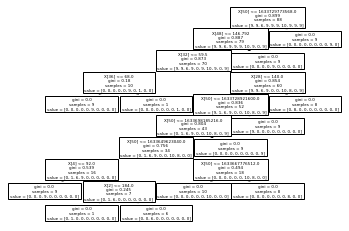

In [15]:
tree.plot_tree(model)

In [16]:
predict_test = model.predict(test_x)
print('Target on test data',predict_test)

Target on test data [ 1  3  3  2  8  3  2  2  2  4  4  4  5  5  5  6  6  6  7  7  7  7  8  6
  8  8 10]


[Text(260.40000000000003, 206.56799999999998, 'X[50] <= 1633729773568.0\ngini = 0.899\nsamples = 88\nvalue = [9, 9, 6, 9, 9, 9, 10, 9, 9, 9]'),
 Text(223.20000000000002, 184.824, 'X[48] <= 146.792\ngini = 0.887\nsamples = 79\nvalue = [9, 9, 6, 9, 9, 9, 10, 9, 0, 9]'),
 Text(186.0, 163.07999999999998, 'X[32] <= 59.5\ngini = 0.873\nsamples = 70\nvalue = [9, 9, 6, 9, 0, 9, 10, 9, 0, 9]'),
 Text(111.60000000000001, 141.336, 'X[35] <= 279.0\ngini = 0.18\nsamples = 10\nvalue = [0, 0, 0, 0, 0, 9, 0, 1, 0, 0]'),
 Text(74.4, 119.592, 'gini = 0.0\nsamples = 9\nvalue = [0, 0, 0, 0, 0, 9, 0, 0, 0, 0]'),
 Text(148.8, 119.592, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]'),
 Text(260.40000000000003, 141.336, 'X[28] <= 140.0\ngini = 0.854\nsamples = 60\nvalue = [9, 9, 6, 9, 0, 0, 10, 8, 0, 9]'),
 Text(223.20000000000002, 119.592, 'X[50] <= 1633728921600.0\ngini = 0.836\nsamples = 52\nvalue = [9, 1, 6, 9, 0, 0, 10, 8, 0, 9]'),
 Text(186.0, 97.848, 'X[50] <= 1633698185216.0\ngini = 

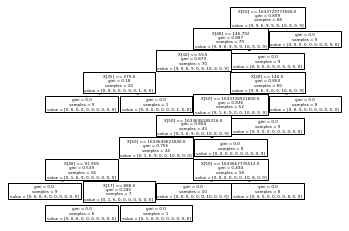

In [17]:
treeModel = tree.DecisionTreeClassifier()
treeModel = treeModel.fit(train_x, train_y)
tree.plot_tree(treeModel)

In [ ]:
X = data.drop(columns=['52'],axis=1)
y = data['52']
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X, y, cv=5)
print(scores, scores.mean())